In [1]:
import sklearn.datasets
import sklearn.svm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.metrics


In [2]:
# Load Iris dataset (three different types of flower: setosa, versicolor, virginica)
iris = sklearn.datasets.load_iris()
"""returns a dictionary-like object, the interesting attributes are:
    ‘data’, the data to learn,
    ‘target’, the classification labels,
    ‘target_names’, the meaning of the labels,
    ‘feature_names’, the meaning of the features,
    ‘DESCR’, the full description of the dataset.
"""


'returns a dictionary-like object, the interesting attributes are:\n    ‘data’, the data to learn,\n    ‘target’, the classification labels,\n    ‘target_names’, the meaning of the labels,\n    ‘feature_names’, the meaning of the features,\n    ‘DESCR’, the full description of the dataset.\n'

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

x = iris.data[:, :2]
y = iris.target

In [4]:
# Split the data into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [5]:
# Train a linear SVM Classifier
SVM_linear = sklearn.svm.SVC(kernel='linear', C=1)
SVM_linear.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
# Check whether this performs at all
y_pred = SVM_linear.predict(x_test)
print(sklearn.metrics.classification_report(y_test, y_pred))
print("Overall Accuracy:", round(sklearn.metrics.accuracy_score(y_test, y_pred),2))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98        24
          1       0.74      0.78      0.76        18
          2       0.75      0.67      0.71        18

avg / total       0.83      0.83      0.83        60

Overall Accuracy: 0.83


In [7]:
# Visualise our classification
%load_ext autoreload
%autoreload 2
from svmPlot import svmPlot

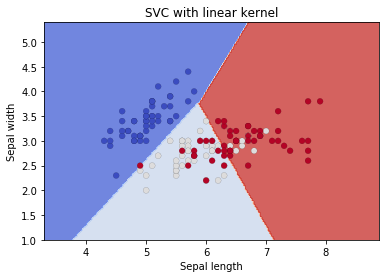

In [12]:
svmPlot(x, y, SVM_linear)

In [13]:
# Try again with polynomial and Radial Basis Function kernels
SVM_poly = sklearn.svm.SVC(kernel='poly', C=1, degree =2)
SVM_rbf = sklearn.svm.SVC(kernel='rbf', C=1, gamma =1)

In [14]:
def trainAndPlot(svm):
    global x,y, x_train, x_test, y_train, y_test
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
#     print(sklearn.metrics.classification_report(y_test, y_pred))
#     print("Overall Accuracy:", round(sklearn.metrics.accuracy_score(y_test, y_pred),2))
    svmPlot(x,y, svm)
    

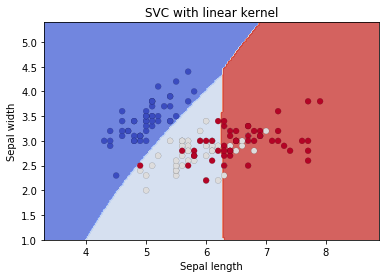

In [15]:
fig =trainAndPlot(SVM_poly)

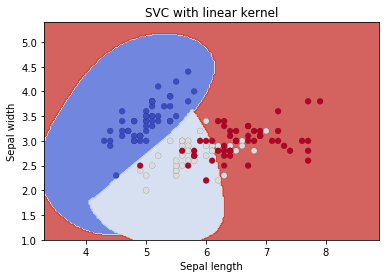

In [16]:
trainAndPlot(SVM_rbf)

2


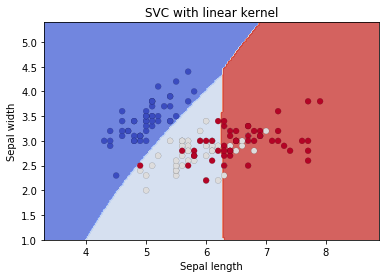

3


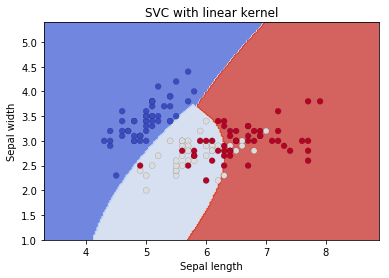

4


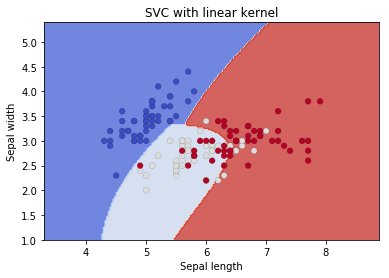

5


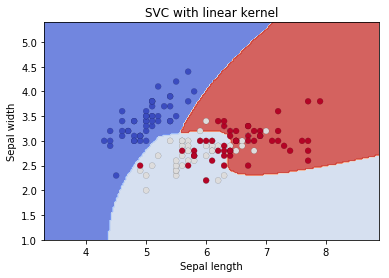

6


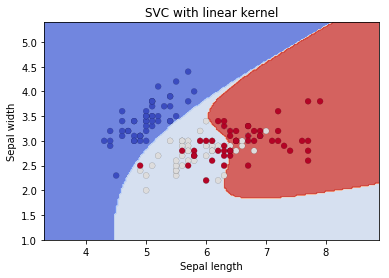

7


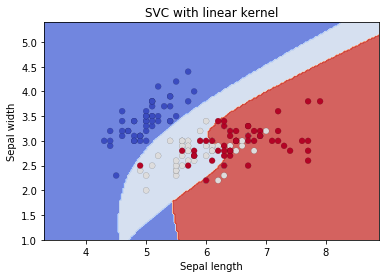

8


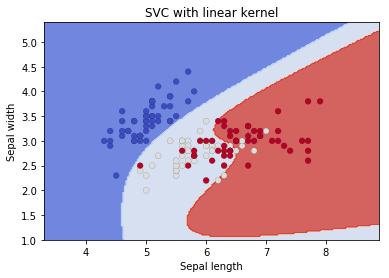

9


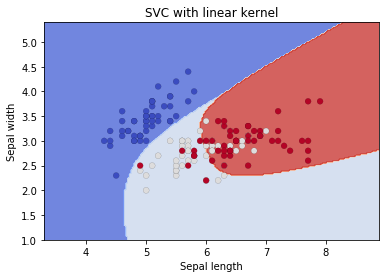

In [17]:
# Plot for differing degrees
for i in range(2, 10):
    print(i)
    SVM_poly = sklearn.svm.SVC(kernel='poly', C=1, degree=i)
    trainAndPlot(SVM_poly)


1


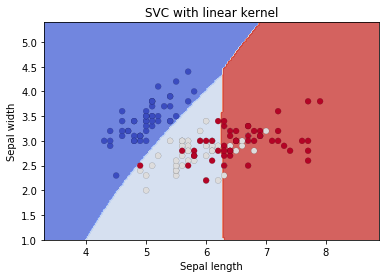

11


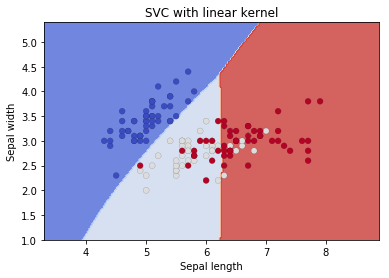

21


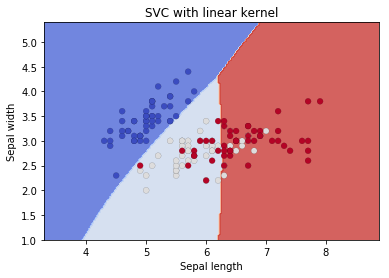

31


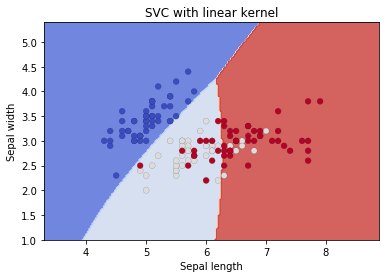

41


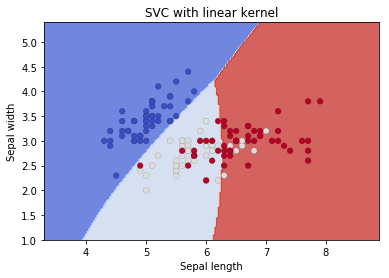

51


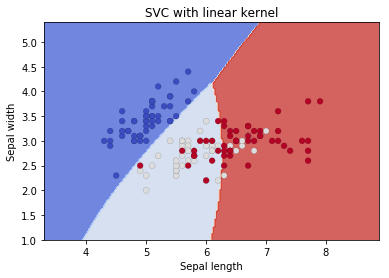

61


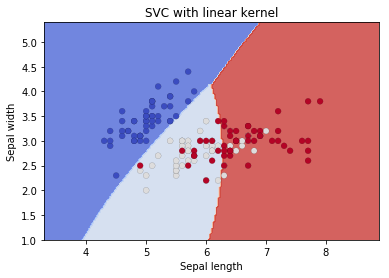

71


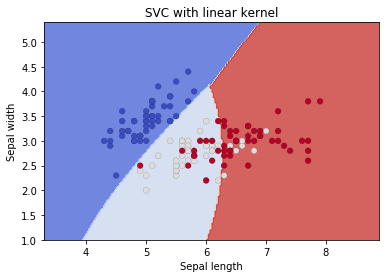

81


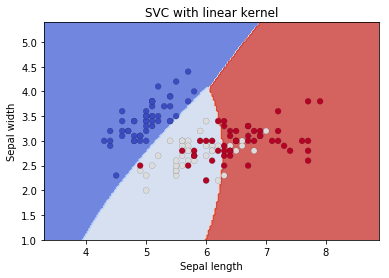

91


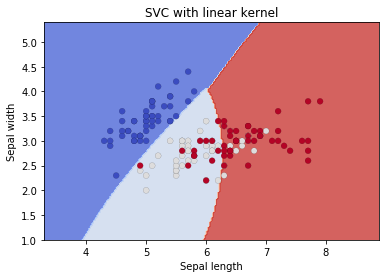

In [18]:
# Plot for differing C params
for i in range(1, 101, 10):
    print(i)
    SVM_poly = sklearn.svm.SVC(kernel='poly', C=i, degree=2)
    trainAndPlot(SVM_poly)

C: 1


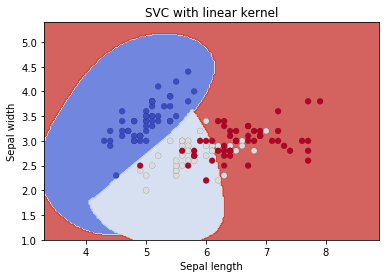

C: 11


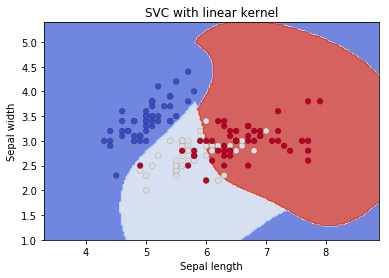

C: 21


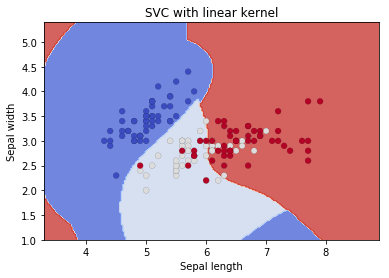

C: 31


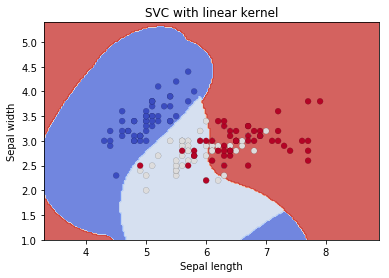

C: 41


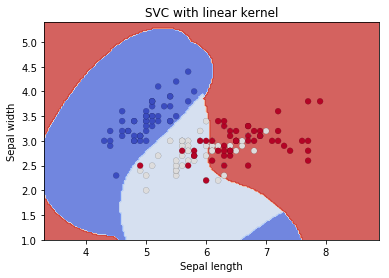

C: 51


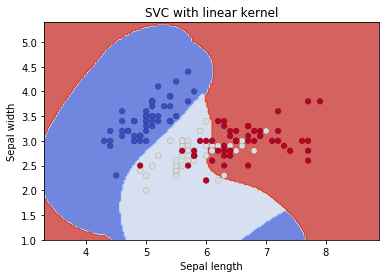

C: 61


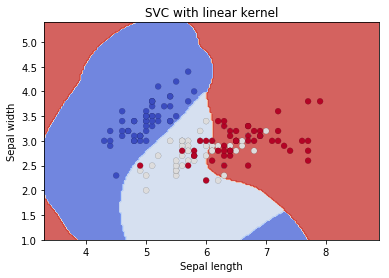

C: 71


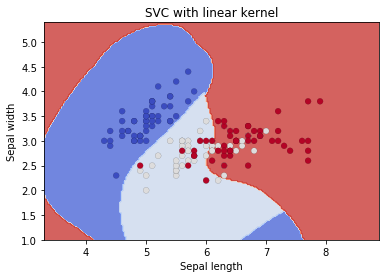

C: 81


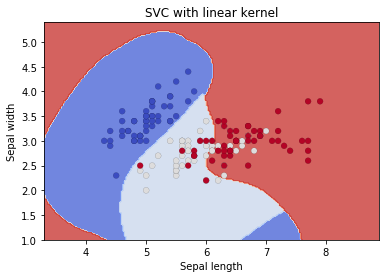

C: 91


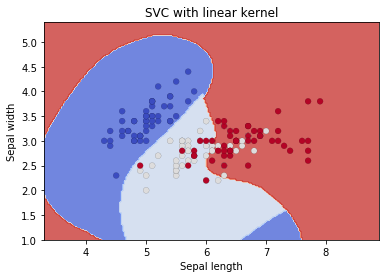

In [19]:
# Repeat for RBF
# Plot for differing C params
for i in range(1, 101, 10):
    print("C:", i)
    SVM_poly = sklearn.svm.SVC(kernel='rbf', C=i, gamma=1)
    trainAndPlot(SVM_poly)

Gamma: 1


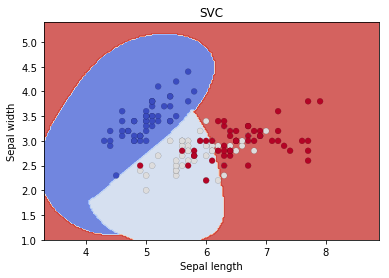

Gamma: 6


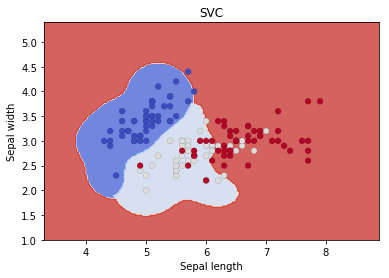

Gamma: 11


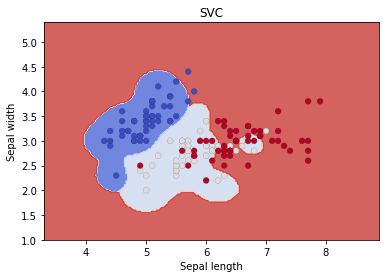

Gamma: 16


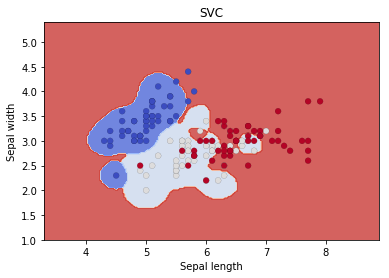

Gamma: 21


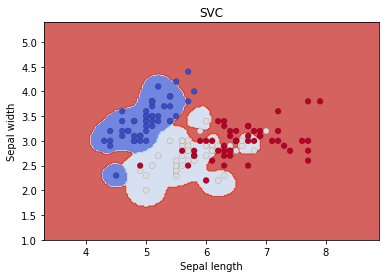

Gamma: 26


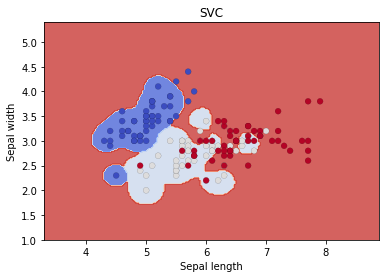

Gamma: 31


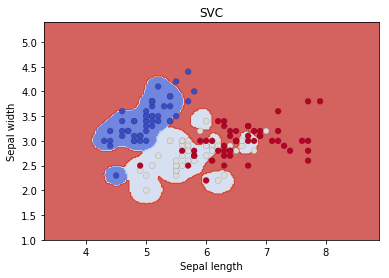

Gamma: 36


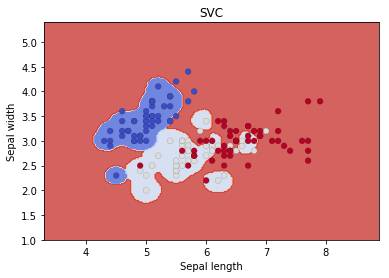

Gamma: 41


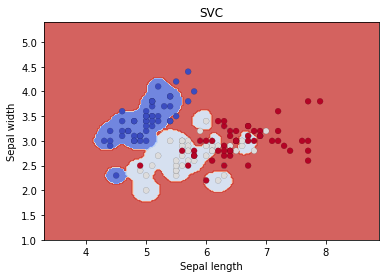

Gamma: 46


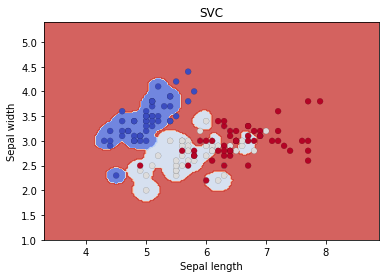

Gamma: 51


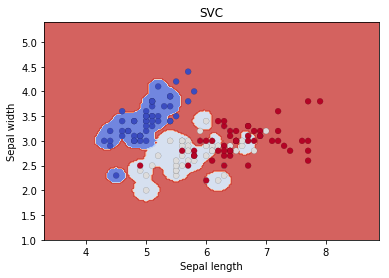

Gamma: 56


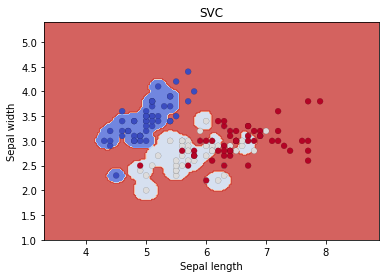

Gamma: 61


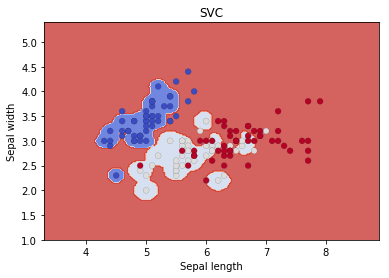

Gamma: 66


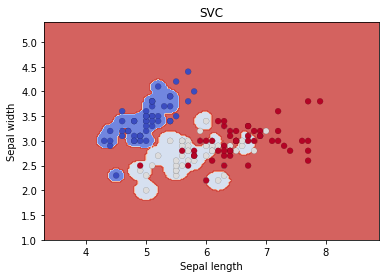

Gamma: 71


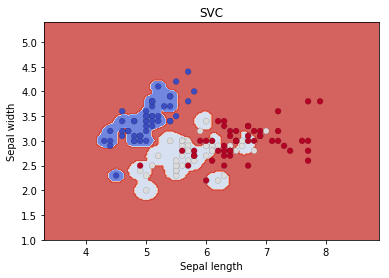

Gamma: 76


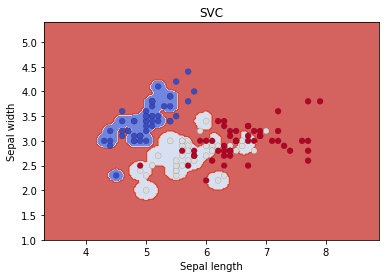

Gamma: 81


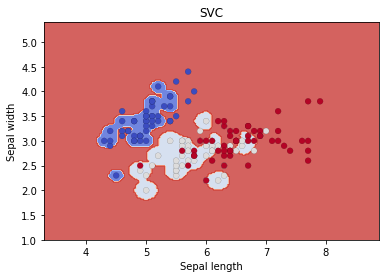

Gamma: 86


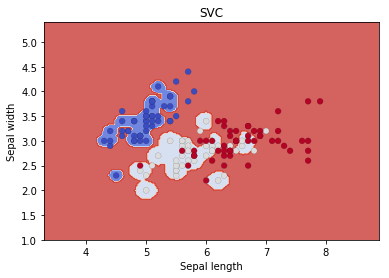

Gamma: 91


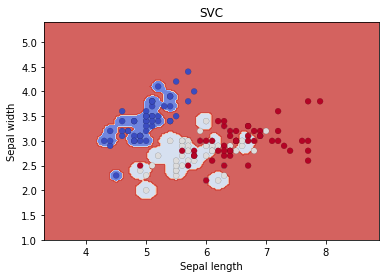

Gamma: 96


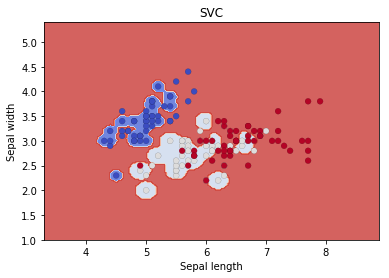

In [21]:
# Plot for differing gamma
for i in range(1, 100, 5):
    print("Gamma:", i)
    SVM_poly = sklearn.svm.SVC(kernel='rbf', C=1, gamma=i)
    trainAndPlot(SVM_poly)

To find the best combination of gamma and C values, we can use grid search. Grid search is simply an
exhaustive search over the range of hyper-parameters with uniform spacing between each sampling point
in the grid. Grid search can be applied to almost all types of machine learning algorithms. In scikit-learn
there is a built-in package named ’GridSearchCV’, which does k-fold cross validation along with grid search.
Below is a code sample of how to do cross validation in the range of [−10, 10] for C and gamma values with
step size equal to 1.

In [51]:
from sklearn.grid_search import GridSearchCV
g_range = 2. ** np.arange(-0.2, 0.2, step=0.01)
C_range = 2. ** np.arange(-3, -2, step=0.01)
parameters  = [{"gamma": g_range, "C": C_range, "kernel": ["rbf"]}]
grid = GridSearchCV(sklearn.svm.SVC(), parameters, cv=10, n_jobs=4)

In [52]:
grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'gamma': array([ 0.87055,  0.87661,  0.8827 ,  0.88884,  0.89503,  0.90125,
        0.90752,  0.91383,  0.92019,  0.92659,  0.93303,  0.93952,
        0.94606,  0.95264,  0.95926,  0.96594,  0.97265,  0.97942,
        0.98623,  0.99309,  1.     ,  1.00696,  1.01396,  1.02101,
        1.... 1.13288,  1.14076]), 'C': array([ 0.125  ,  0.12587, ...,  0.24656,  0.24827]), 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

Best params: gamma= 0.18  and C= -2.71


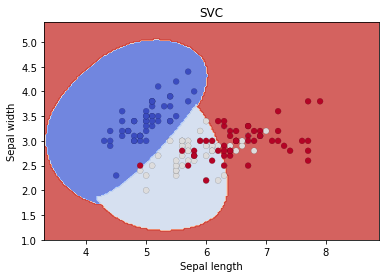

In [53]:
bestG = grid.best_params_['gamma']
bestC = grid.best_params_['C']
print("Best params: gamma=", np.log2(bestG)," and C=", np.log2(bestC))
trainAndPlot(sklearn.svm.SVC(kernel='rbf', C=bestC, gamma=bestG))

In [63]:
# Do the same for polynomial kernels
from sklearn.grid_search import GridSearchCV
degree_range = np.arange(1, 3, step=1)
C_range = 2. ** np.arange(2, 2.5, step=0.01)
parameters  = [{"degree": degree_range, "C": C_range, "kernel": ["poly"]}]
grid = GridSearchCV(sklearn.svm.SVC(), parameters, cv=10, n_jobs=4)

grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'degree': array([1, 2]), 'C': array([ 4.     ,  4.02782,  4.05584,  4.08405,  4.11246,  4.14106,
        4.16986,  4.19887,  4.22807,  4.25748,  4.28709,  4.31691,
        4.34694,  4.37717,  4.40762,  4.43828,  4.46915,  4.50023,
        4.53154,  4.56305,  4.59479,  4.62675,  4.65893,...  5.38893,  5.42642,  5.46416,  5.50217,  5.54044,
        5.57897,  5.61778]), 'kernel': ['poly']}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

Best params: degree= 1  and C= 2.2


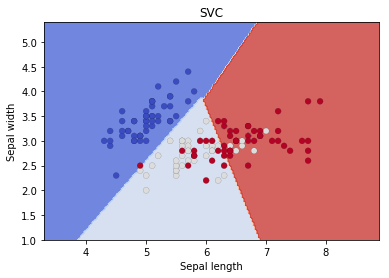

In [61]:
best_degree = grid.best_params_['degree']
bestC = grid.best_params_['C']
print("Best params: degree=", best_degree," and C=", np.log2(bestC))
trainAndPlot(sklearn.svm.SVC(kernel='poly', C=bestC, degree=best_degree))